NumPy is the key library in the Python ecosystem for numerical and scientific applications. Numerical python.
1.   Numpy is particularly efficient if you want to perform the same operation on each element of the structure.
2.  when using lists, youd need to use a for loop to go through each element of the list. 
3. this is not required with NumPy arrays because of vectorisation. 
-   you can perform element by element operations using NumPy arrays very efficiently due to how NumPy is written and implemented. 

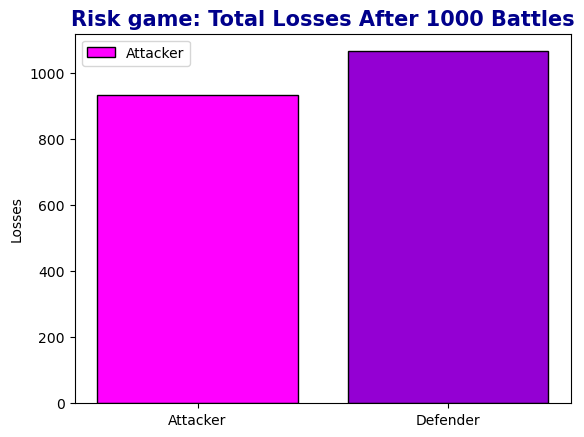

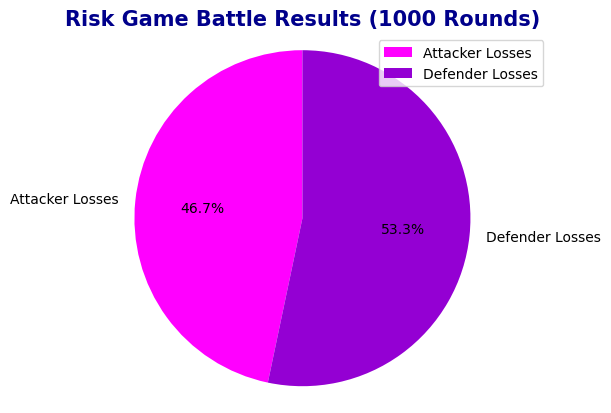

Attacker losses: 934
Defender losses: 1066


In [ ]:
import random
import matplotlib.pyplot as plt

# Variables to track total losses
attacker_losses = 0                                                      # Attacker losses counter starting at 0 due to no losses yet
defender_losses = 0                                                      # Defender losses counter starting at 0 due to no losses yet


num_battles = 1000

# Simulate 1000 battle rounds using a loop
for _ in range(num_battles):             # for loop to loop through the number of battles. in range(num_battles) is the number of battles to be simulated
    # Attacker rolls 3 dice
    attacker_rolls = sorted([random.randint(1, 6) for _ in range(3)], reverse=True)             # three dice rolls in descending order 
    # Defender rolls 2 dice                                                                     
    defender_rolls = sorted([random.randint(1, 6) for _ in range(2)], reverse=True)             # two dice rolls in descending order 

    # Compare the dice, highest to lowest
    for i in range(min(len(attacker_rolls), len(defender_rolls))):         # loop through the number of dice rolled by the attacker and defender    
        if attacker_rolls[i] > defender_rolls[i]:
            defender_losses += 1
        else:
            attacker_losses += 1

# Plot the results:
# Bar chart
plt.bar(['Attacker', 'Defender'], [attacker_losses, defender_losses], color=['magenta', 'darkviolet'], edgecolor='black')
plt.title(f"Risk game: Total Losses After {num_battles} Battles", fontsize=15, fontweight='bold', color='Darkblue')
plt.ylabel('Losses')
plt.legend(['Attacker', 'Defender'])
plt.show()

attacker_total_losses = attacker_losses   
defender_total_losses = defender_losses 




# Pie chart
labels = ['Attacker Losses', 'Defender Losses']
sizes = [attacker_total_losses, defender_total_losses]
colors = ['magenta','darkviolet']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Risk Game Battle Results (1000 Rounds)', fontsize=15, fontweight='bold', color='Darkblue')
plt.legend()
plt.show()

# Print the results
print(f"Attacker losses: {attacker_losses}")
print(f"Defender losses: {defender_losses}")

A player can attack another players territory with one, two or three dice. the player being attacked can defend with either one or two dice. Each die represents a toy troop in a toy army. 

Example: 
1. the attacker chooses to attack with 3 dice and rolls 2,6,3. 
2. the defender defends with two dice and rolls 4 and 5. 
-   result: the attackers 6 is the highest value and beats the defenders higher value of 5. 
-   therefore: the defender defends loose one toy troop. 
-   the defender's second value 4 is higher than the attckers next best value of 3. t
-   therefore: the attacker loses one toy troop. 
3.  both players lose one toy troop each in this attack. 

You can simulate an attack in Risk using a python program:
1.  Generate one,two or three random numbers between 1 and 6 for the attacker and sort them in descending order. 
2.  Generate one or two random numbers between 1 and 6 for the defender and sort them in descending order. 
3. Compare the maximum values from each set and determine whether the attacker or the defender won. 
4. Compare the second value from each set, if present and determine whether attacker or defender won. 

you can simulate several attacks and keep a tally of how many bouts the attacker and defender won. 
1. the attackers winning percentage is:
-   (number of attacker wins/total number of bouts)*100

**Simulating attacks in Risk**
Each attack in Risk can have one of 6 configurations depending on how many dice the attacker and defender choose to use. 

In [2]:
options = [(x,y) for x in range(1,4) for y in range(1,3)]
print(options)

[(1, 1), (1, 2), (2, 1), (2, 2), (3, 1), (3, 2)]


The pairs match the six attack configurations shown in the table earlier. In each pair, the first number is the number of attackers (the number of dice the attacker is using), and the second number is the number of defenders. 

**using named tuple** instead of a standard tuple to create these options. 

In [ ]:
from typing import NamedTuple
class Attack(NamedTuple):
    num_attackers: int
    num_defenders: int

options = [
    Attack(x,y) for x in range(1,4) for y in range(1,3)
]
print(options)




[Attack(num_attackers=1, num_defenders=1), Attack(num_attackers=1, num_defenders=2), Attack(num_attackers=2, num_defenders=1), Attack(num_attackers=2, num_defenders=2), Attack(num_attackers=3, num_defenders=1), Attack(num_attackers=3, num_defenders=2)]


The output now shows the same pairs as earlier, but this time as a list of named tuples Attack rather than standard tuples. 
-   A named tuple allows you to access the data using the attribute names. you can still use the normal tuple indexing if you wish. 

In [5]:
from typing import NamedTuple
class Attack(NamedTuple):
    num_attackers: int
    num_defenders: int

options = [
    Attack(x,y) for x in range(1,4) for y in range(1,3)
]

option = options[-1]
print(option[0], option[1])
print(option.num_attackers, option.num_defenders)

3 2
3 2


In [8]:
from typing import NamedTuple
import numpy as np

class Attack(NamedTuple):
    num_attackers: int
    num_defenders: int

options = [
    Attack(x,y) for x in range(1,4) for y in range(1,3)
]
for option in options:
    print(option)

    attack = np.random.randint(1,7, option.num_attackers)
    print(attack)

    defence = np.random.randint(1,7, option.num_defenders)
    print(defence)

Attack(num_attackers=1, num_defenders=1)
[1]
[2]
Attack(num_attackers=1, num_defenders=2)
[4]
[2 1]
Attack(num_attackers=2, num_defenders=1)
[3 2]
[3]
Attack(num_attackers=2, num_defenders=2)
[1 2]
[4 6]
Attack(num_attackers=3, num_defenders=1)
[1 2 6]
[6]
Attack(num_attackers=3, num_defenders=2)
[4 2 3]
[4 3]


-   Each ndarray generated has random numbers between 1 and 6 representing the numbers on the dice rolled.
-   the for loop runs six times. 
-   Therefore: you can see six sections in this output, one for each attack configuration.  

### using NumPy's newer generator for Random Numbers:

remember:
1. random.randint() includes the end-point. dice roll=(1,6)
2. np.random.randint() does not include end-point. dice roll =(1,7)



NumPy now has a newer system for generating random numbers instead of np.random.randint()
-   np.default_rng()

In [11]:
from typing import NamedTuple
import numpy as np

class Attack(NamedTuple):
    num_attackers: int
    num_defenders: int

options = [
    Attack(x,y) for x in range(1,4) for y in range(1,3)
]

rng = np.random.default_rng()

for option in options:
    print(option)

    attack = rng.integers(1,7, option.num_attackers)
    print(attack)

    defence = rng.integers(1,7, option.num_defenders)
    print(defence)

Attack(num_attackers=1, num_defenders=1)
[6]
[1]
Attack(num_attackers=1, num_defenders=2)
[4]
[5 3]
Attack(num_attackers=2, num_defenders=1)
[6 4]
[2]
Attack(num_attackers=2, num_defenders=2)
[6 5]
[4 2]
Attack(num_attackers=3, num_defenders=1)
[2 4 3]
[1]
Attack(num_attackers=3, num_defenders=2)
[2 6 5]
[2 5]


In [ ]:
# integers() method is similar to randint but it is faster and more efficient. 
# It generates random integers from low (inclusive) to high (exclusive) and it is more efficient than randint.


**Sorting the dice in each set in descending order.**
-   need to match the max value from the attackers dice rolls with the max value from the defenders dice rolls and so on. 
-   therefore we can sort arrays containing the dice rolls in descending order. 
-   Numpys ndarray has a sort() method you can use:

In [ ]:
from typing import NamedTuple
import numpy as np

class Attack(NamedTuple):
    num_attackers: int
    num_defenders: int

options = [ Attack(x,y) for x in range(1,4) for y in range(1,3) ]

rng = np.random.default_rng()

for option in options:
    print(option)

    attack = rng.integers(1,7, option.num_attackers)
    print(attack)

    defence = rng.integers(1,7, option.num_defenders)
    print(defence)

    attack.sort()
    defence.sort()
    print(attack, defence)

  # this code outputs arrays with values sorted in ascending order.

Attack(num_attackers=1, num_defenders=1)
[4]
[5]
[4] [5]
Attack(num_attackers=1, num_defenders=2)
[5]
[2 4]
[5] [2 4]
Attack(num_attackers=2, num_defenders=1)
[2 2]
[2]
[2 2] [2]
Attack(num_attackers=2, num_defenders=2)
[1 1]
[1 1]
[1 1] [1 1]
Attack(num_attackers=3, num_defenders=1)
[1 2 2]
[1]
[1 2 2] [1]
Attack(num_attackers=3, num_defenders=2)
[5 5 4]
[2 2]
[4 5 5] [2 2]


In [23]:
# Next, you can reverse the numbers in the arrays using the flip() method.
# The flip() method reverses the order of elements in an array along a given axis.
# the flip() method takes an array and an axis as arguments.
# the flip() is not a method in the nd array class but a function which returns a new array.

from typing import NamedTuple
import numpy as np

class Attack(NamedTuple):
    num_attackers: int
    num_defenders: int

options = [ Attack(x,y) for x in range(1,4) for y in range(1,3) ]

rng = np.random.default_rng()

for option in options:
    print(option)

    attack = rng.integers(1,7, option.num_attackers)
    attack.sort()
    print(attack)

    defence = rng.integers(1,7, option.num_defenders)
    defence.sort()
    print(defence)
print('______________________________________________________')
print('All the arrays are now sorted from highest to lowest', )

Attack(num_attackers=1, num_defenders=1)
[5]
[6]
Attack(num_attackers=1, num_defenders=2)
[4]
[5 5]
Attack(num_attackers=2, num_defenders=1)
[2 5]
[6]
Attack(num_attackers=2, num_defenders=2)
[5 6]
[2 4]
Attack(num_attackers=3, num_defenders=1)
[1 1 4]
[5]
Attack(num_attackers=3, num_defenders=2)
[1 3 5]
[1 2]
______________________________________________________
All the arrays are now sorted from highest to lowest


so far:
1. created all 6 attack configurations as a list of named tuples. 
2. created a set of dice rolls for the attacker and defender for each of the configurations.
3. All dice rolls are in descending order. 

still need to:

1. determine how many wins the attacker has in each attack. 
2. simulate 1000 attacks for each configuration. 
3. work out the winning percentage for each attack configuration 

currently:
1. the arrays attack and defence (created using integers()) are 1-D arrays.-->single row of numbers like a list. 
2.  we can change these arrays to 2D ones with 1000 rows and 1,2,3 columns. (depending on how many dice rolled).
3. the rows represent the different sets of dice rolls. 

In [ ]:
# simulate 1000 battles using vectorized operations

from typing import NamedTuple

import numpy as np

class Attack(NamedTuple):
    n_attackers: int
    n_defenders: int

options = [
    Attack(x, y) for x in range(1, 4) for y in range(1, 3)
]

rng = np.random.default_rng()

for option in options:
    print(option)

    attack = rng.integers(1, 7, option.n_attackers)
    attack.sort()
    attack = np.flip(attack)
    print(attack)

    defence = rng.integers(1, 7, option.n_defenders)
    defence.sort()
    defence = np.flip(defence)
    print(defence)

    min_length = min(len(attack), len(defence)) # get the minimum length of the two arrays to compare the values
    result = attack[:min_length] > defence[:min_length] # compare the values in the two arrays and get the result

    print(result)
    print()



Attack(n_attackers=1, n_defenders=1)
[5]
[6]
[False]

Attack(n_attackers=1, n_defenders=2)
[6]
[6 6]
[False]

Attack(n_attackers=2, n_defenders=1)
[5 3]
[5]
[False]

Attack(n_attackers=2, n_defenders=2)
[5 4]
[6 1]
[False  True]

Attack(n_attackers=3, n_defenders=1)
[5 4 2]
[2]
[ True]

Attack(n_attackers=3, n_defenders=2)
[5 3 2]
[1 1]
[ True  True]



- the boolean values are the results of comparing each corresponding die in the sorted attack and defense rolls. 
-  the true or false values ubducate wheter the attackers dice is greater than the defenders dice. 
-  the boolean comparison attack(i) gives True when the attackers dice is greater and False when the defenders dice is greater or equal. 

repeating the exercise * 1000

-   youve got code that can simulate any attack using any of the six possible attack configurations. 
-   to get a reasonable estimate of the success rate for each type of attack, youll need to repeat these attacks many times and get an average of the winning percentage. 

In [ ]:
import numpy as np
rng = np.random.default_rng()

attack = rng.integers(1,7,3) # array of 3 random integers between 1 and 6. 3rd argumen is 3 which is the number of dice to roll
attack
np.array([2,2,4]) # array of 3 integers 

attack.shape # shape of the array
(3,)
attack.ndim # number of dimensions
1

1

In [31]:
attack = rng.integers(1,7, size=(5,3)) # 5 rows and 3 columns of random integers between 1 and 6
attack
np.array([[5, 2, 3],
         [6, 6, 2],
         [6, 5, 2],
         [1, 3, 3],
         [2, 3, 5]])
attack.shape
(5, 3)
attack.ndim
2

2

In [ ]:
attack[1,2] # 2nd row and 3rd column 
2 

attack[0,1] # 1st row and 2nd column
2
attack[3,-1] # 4th row and last column 
3
attack[;,1] # all rows and 2nd column
# array([2, 6, 5, 3, 3])

attack[4,:] # 5th row and all columns 
# array([2, 3, 5])

6

### Refactoring Code to add multiple attacks.

-   n_repeats variable and set to 5--> to create a 2D attack and defence arrays.
-   

In [37]:
from typing import NamedTuple
import numpy as np

n_repeats = 5

class Attack(NamedTuple):
    n_attackers: int
    n_defenders: int

options = [
    Attack(x, y) for x in range(1, 4) for y in range(1, 3)
]

rng = np.random.default_rng()

for option in options:
    print(option)

    attack = rng.integers(1, 7, size=(n_repeats, option.n_attackers))
    #attack.sort()
    #attack = np.flip(attack)
    print(attack)

    defence = rng.integers(1, 7, size=(n_repeats, option.n_defenders))
    #defence.sort()
    #defence = np.flip(defence)
    print(defence)

#min_length = min(len(attack), len(defence))
#result = attack[:min_length] > defence[:min_length]

#print(result)
print()


    

Attack(n_attackers=1, n_defenders=1)
[[1]
 [4]
 [2]
 [5]
 [6]]
[[2]
 [1]
 [6]
 [5]
 [3]]
Attack(n_attackers=1, n_defenders=2)
[[1]
 [6]
 [3]
 [2]
 [4]]
[[4 3]
 [3 4]
 [3 5]
 [2 2]
 [3 1]]
Attack(n_attackers=2, n_defenders=1)
[[3 2]
 [1 6]
 [4 4]
 [3 1]
 [1 2]]
[[1]
 [1]
 [4]
 [3]
 [4]]
Attack(n_attackers=2, n_defenders=2)
[[4 6]
 [5 4]
 [4 1]
 [4 5]
 [2 2]]
[[6 3]
 [3 3]
 [4 2]
 [5 4]
 [5 2]]
Attack(n_attackers=3, n_defenders=1)
[[6 1 5]
 [1 3 3]
 [3 1 6]
 [5 6 1]
 [4 5 5]]
[[1]
 [3]
 [6]
 [1]
 [5]]
Attack(n_attackers=3, n_defenders=2)
[[3 4 2]
 [5 1 1]
 [5 5 1]
 [3 6 4]
 [2 1 2]]
[[1 3]
 [1 4]
 [4 6]
 [4 2]
 [5 4]]



all the rows are in descending order. 
-   flip() flips over all the axes. 

In [38]:
import numpy as np
rng = np.random.default_rng()

attack = rng.integers(1,7,size =(5,3)) # array of 3 random integers between 1 and 6. 3rd argumen is 3 which is the number of dice to
attack
np.array([[2, 5, 6],
         [4, 6, 3],
         [5, 4, 4],
         [3, 4, 2],
         [4, 4, 3]])

np.flip(attack) # reverse the order of the elements in the array
np.array([[6, 5, 2],
         [3, 6, 4],
         [4, 4, 5],
         [2, 4, 3],
         [3, 4, 4]])

np.flip(attack, axis=0) # reverse the order of the elements in the array along the rows
np.array([[4, 4, 3],
         [3, 4, 2],
         [5, 4, 4],
         [4, 6, 3],
         [2, 5, 6]])

np.flip(attack, axis=1) # reverse the order of the elements in the array along the columns
np.array([[6, 5, 2],
         [3, 6, 4],
         [4, 4, 5],
         [2, 4, 3],
         [3, 4, 4]])




array([[6, 5, 2],
       [3, 6, 4],
       [4, 4, 5],
       [2, 4, 3],
       [3, 4, 4]])

when you call np.flip(attack) with no additional argument, the original array is flipped along both axes: left to right and top to bottom. 
-   in the second test you add axis = 0 as an argument to flip().axis=0 represents the vertical axis and youll note that the array returned is flipped along the vertical axis but not along the horizonatal. 
-   axis = 1 which means that flip() will act along the horizontal axis. this is the option you need in your code since there is no need to flip along the vertical axis as well. 

In [40]:
from typing import NamedTuple
import numpy as np

n_repeats = 5

class Attack(NamedTuple):
    n_attackers: int
    n_defenders: int

options = [
    Attack(x, y) for x in range(1, 4) for y in range(1, 3)
]

rng = np.random.default_rng()

for option in options:
    print(option)

    attack = rng.integers(1, 7, size=(n_repeats, option.n_attackers))
    attack = np.flip(attack, axis=1)
    print(attack)

    defence = rng.integers(1, 7, size=(n_repeats, option.n_defenders))
    defence = np.flip(defence, axis=1)
    print(defence)

   # min_length = min(attack.shape[1], defence.shape[1])
    #result = attack[:, :min_length] > defence[:, :min_length]

    #print(result)
    print()

Attack(n_attackers=1, n_defenders=1)
[[1]
 [6]
 [5]
 [4]
 [4]]
[[6]
 [2]
 [2]
 [6]
 [5]]

Attack(n_attackers=1, n_defenders=2)
[[3]
 [1]
 [1]
 [1]
 [5]]
[[5 6]
 [4 1]
 [6 6]
 [3 2]
 [3 1]]

Attack(n_attackers=2, n_defenders=1)
[[1 3]
 [4 4]
 [5 3]
 [2 1]
 [1 3]]
[[4]
 [1]
 [4]
 [2]
 [1]]

Attack(n_attackers=2, n_defenders=2)
[[1 3]
 [4 6]
 [1 2]
 [2 5]
 [5 1]]
[[5 4]
 [3 5]
 [4 5]
 [1 3]
 [1 1]]

Attack(n_attackers=3, n_defenders=1)
[[4 5 5]
 [3 3 3]
 [2 2 6]
 [5 4 1]
 [1 3 1]]
[[3]
 [4]
 [1]
 [5]
 [5]]

Attack(n_attackers=3, n_defenders=2)
[[5 1 6]
 [3 5 5]
 [3 6 4]
 [3 2 5]
 [2 6 5]]
[[5 3]
 [2 1]
 [5 6]
 [3 5]
 [5 2]]



### Truncate each row using the minimum length: 

in previous version of the code, when you had 1D arrays, you used the built in len() function to find the lengths of the attack and defence arrays. HOwever since your now using 2D arrays yoe which you can use the **shape** attribute and get its second value which represents how many items are in each row. 
-   an array with 5 rows and 3 columns, its shape is (5,3)
-   therefore you can replace ```min_length=min(len(attack), len(defence)``` with ```min_length = min(attack.shape[1], defnce.shape[1])```

attack and defence are now 2D arrays. Therefore```attack[:min_length] and defence[:min_length] are not longer the expressions you need to slice the arrays since those are 1D slices. 
-   need to keep all the rows in the arrays but truncate the columns. YOu can achieve this using the expressions ```attack[:,min_length]``` and ```defence[:,min_length]```
-    the colon before the comma represents all the rows
-   after the comma in square brackets you write the slice ```:min_length``` this represents all the elements in each row from the beginning up to the element with index ```min_length -1```

In [ ]:
from typing import NamedTuple
import numpy as np

n_repeats = 5

class Attack(NamedTuple):
    n_attackers: int
    n_defenders: int

options = [
    Attack(x, y) for x in range(1, 4) for y in range(1, 3)
]

rng = np.random.default_rng()

for option in options:
    print(option)

    attack = rng.integers(1, 7, size=(n_repeats, option.n_attackers))
    attack.sort()
    attack = np.flip(attack, axis=1)
    print(attack)

    defence = rng.integers(1, 7, size=(n_repeats, option.n_defenders))
    defence.sort()
    defence = np.flip(defence, axis=1)
    print(defence)

    min_length = min(attack.shape[1], defence.shape[1])
    result = attack[:, :min_length] > defence[:, :min_length]

    print(result)
    print(np.sum(result)) 
    print()

Attack(n_attackers=1, n_defenders=1)
[[1]
 [2]
 [5]
 [6]
 [2]]
[[5]
 [3]
 [1]
 [2]
 [6]]
[[False]
 [False]
 [ True]
 [ True]
 [False]]
2

Attack(n_attackers=1, n_defenders=2)
[[3]
 [3]
 [2]
 [1]
 [5]]
[[2 1]
 [5 2]
 [3 2]
 [4 3]
 [3 1]]
[[ True]
 [False]
 [False]
 [False]
 [ True]]
2

Attack(n_attackers=2, n_defenders=1)
[[6 1]
 [3 2]
 [4 3]
 [6 5]
 [5 5]]
[[3]
 [4]
 [1]
 [1]
 [1]]
[[ True]
 [False]
 [ True]
 [ True]
 [ True]]
4

Attack(n_attackers=2, n_defenders=2)
[[5 4]
 [2 1]
 [3 2]
 [5 4]
 [5 1]]
[[6 4]
 [5 4]
 [5 3]
 [5 3]
 [6 1]]
[[False False]
 [False False]
 [False False]
 [False  True]
 [False False]]
1

Attack(n_attackers=3, n_defenders=1)
[[4 2 1]
 [5 2 1]
 [6 5 2]
 [6 5 2]
 [5 5 1]]
[[3]
 [4]
 [6]
 [6]
 [3]]
[[ True]
 [ True]
 [False]
 [False]
 [ True]]
3

Attack(n_attackers=3, n_defenders=2)
[[6 3 1]
 [5 3 2]
 [6 4 2]
 [6 4 3]
 [5 4 2]]
[[6 2]
 [4 1]
 [4 4]
 [6 3]
 [2 2]]
[[False  True]
 [ True  True]
 [ True False]
 [False  True]
 [ True  True]]
7



```np.sum()``` returns the true values.
-   can also find the total number of items in results using the attribute ```result.size```

In [44]:
from typing import NamedTuple
import numpy as np

n_repeats = 5

class Attack(NamedTuple):
    n_attackers: int
    n_defenders: int

options = [
    Attack(x, y) for x in range(1, 4) for y in range(1, 3)
]

rng = np.random.default_rng()

for option in options:
    print(option)

    attack = rng.integers(1, 7, size=(n_repeats, option.n_attackers))
    attack.sort()
    attack = np.flip(attack, axis=1)
    print(attack)

    defence = rng.integers(1, 7, size=(n_repeats, option.n_defenders))
    defence.sort()
    defence = np.flip(defence, axis=1)
    print(defence)

    min_length = min(attack.shape[1], defence.shape[1])
    result = attack[:, :min_length] > defence[:, :min_length]

    print(result)
    winning_percentage = np.sum(result)/result.size * 100
    print(f"Winning percentage for {option} is {winning_percentage:0.2f} %")
    
    print()

Attack(n_attackers=1, n_defenders=1)
[[5]
 [1]
 [4]
 [6]
 [5]]
[[4]
 [3]
 [6]
 [1]
 [6]]
[[ True]
 [False]
 [False]
 [ True]
 [False]]
Winning percentage for Attack(n_attackers=1, n_defenders=1) is 40.00 %

Attack(n_attackers=1, n_defenders=2)
[[6]
 [4]
 [6]
 [2]
 [1]]
[[3 1]
 [5 3]
 [4 1]
 [5 3]
 [6 3]]
[[ True]
 [False]
 [ True]
 [False]
 [False]]
Winning percentage for Attack(n_attackers=1, n_defenders=2) is 40.00 %

Attack(n_attackers=2, n_defenders=1)
[[5 5]
 [1 1]
 [5 3]
 [1 1]
 [4 2]]
[[3]
 [1]
 [4]
 [6]
 [5]]
[[ True]
 [False]
 [ True]
 [False]
 [False]]
Winning percentage for Attack(n_attackers=2, n_defenders=1) is 40.00 %

Attack(n_attackers=2, n_defenders=2)
[[4 3]
 [5 5]
 [3 2]
 [4 2]
 [4 2]]
[[6 1]
 [3 2]
 [3 1]
 [6 4]
 [5 5]]
[[False  True]
 [ True  True]
 [False  True]
 [False False]
 [False False]]
Winning percentage for Attack(n_attackers=2, n_defenders=2) is 40.00 %

Attack(n_attackers=3, n_defenders=1)
[[5 4 3]
 [6 4 1]
 [6 2 1]
 [3 1 1]
 [5 4 1]]
[[2]
 [2]
 [5]
 [6]

final step: you can change from simulating 5 attacks for each configuration to simulating 1000. however you probably dont want to display the arrays this time. your final step is to change the value of ```n_repeats ``` and comment out or delete the print() function which displays the arrays. 

In [45]:
from typing import NamedTuple
import numpy as np

n_repeats = 5

class Attack(NamedTuple):
    n_attackers: int
    n_defenders: int

options = [
    Attack(x, y) for x in range(1, 4) for y in range(1, 3)
]

rng = np.random.default_rng()

for option in options:
    print(option)

    attack = rng.integers(1, 7, size=(n_repeats, option.n_attackers))
    attack.sort()
    attack = np.flip(attack, axis=1)
    print(attack)

    defence = rng.integers(1, 7, size=(n_repeats, option.n_defenders))
    defence.sort()
    defence = np.flip(defence, axis=1)
    print(defence)

    min_length = min(attack.shape[1], defence.shape[1])
    result = attack[:, :min_length] > defence[:, :min_length]

    # print(result)
    winning_percentage = np.sum(result)/result.size * 100
    print(f"Winning percentage for {option} is {winning_percentage:0.2f} %")
    
    print()

Attack(n_attackers=1, n_defenders=1)
[[3]
 [3]
 [3]
 [3]
 [5]]
[[3]
 [5]
 [1]
 [5]
 [5]]
Winning percentage for Attack(n_attackers=1, n_defenders=1) is 20.00 %

Attack(n_attackers=1, n_defenders=2)
[[4]
 [4]
 [1]
 [2]
 [2]]
[[4 2]
 [5 4]
 [4 2]
 [5 1]
 [6 4]]
Winning percentage for Attack(n_attackers=1, n_defenders=2) is 0.00 %

Attack(n_attackers=2, n_defenders=1)
[[4 3]
 [3 1]
 [6 4]
 [5 2]
 [3 2]]
[[5]
 [5]
 [5]
 [5]
 [6]]
Winning percentage for Attack(n_attackers=2, n_defenders=1) is 20.00 %

Attack(n_attackers=2, n_defenders=2)
[[5 4]
 [6 1]
 [5 3]
 [3 1]
 [6 2]]
[[6 4]
 [5 1]
 [6 5]
 [6 6]
 [6 6]]
Winning percentage for Attack(n_attackers=2, n_defenders=2) is 10.00 %

Attack(n_attackers=3, n_defenders=1)
[[6 3 1]
 [5 5 3]
 [4 2 2]
 [6 4 1]
 [6 6 2]]
[[6]
 [4]
 [2]
 [6]
 [6]]
Winning percentage for Attack(n_attackers=3, n_defenders=1) is 40.00 %

Attack(n_attackers=3, n_defenders=2)
[[2 2 1]
 [6 1 1]
 [3 3 1]
 [6 6 3]
 [6 5 3]]
[[3 2]
 [4 1]
 [5 3]
 [5 3]
 [4 3]]
Winning percentag

-   when an attacker attacks with one die and the defender defends with one die, the defender has the advantage since ties are settled in favour of the defender. 
-   never attack with one die when the defender is defending with 2. 
- most common type of attack in risk is 3 attackers against 2 defenders.

Attack(n_attackers=1, n_defenders=1)
[[2]
 [5]
 [4]
 [5]
 [6]
 [3]
 [2]
 [6]
 [2]
 [3]
 [1]
 [5]
 [2]
 [4]
 [1]
 [2]
 [2]
 [1]
 [1]
 [6]
 [4]
 [1]
 [5]
 [5]
 [5]
 [5]
 [3]
 [6]
 [6]
 [2]
 [6]
 [5]
 [5]
 [3]
 [5]
 [3]
 [6]
 [6]
 [5]
 [6]
 [5]
 [1]
 [6]
 [3]
 [5]
 [6]
 [2]
 [1]
 [1]
 [4]
 [1]
 [4]
 [1]
 [3]
 [4]
 [2]
 [6]
 [2]
 [5]
 [4]
 [6]
 [2]
 [6]
 [5]
 [5]
 [6]
 [4]
 [3]
 [4]
 [6]
 [3]
 [4]
 [2]
 [3]
 [2]
 [2]
 [2]
 [2]
 [5]
 [5]
 [2]
 [2]
 [2]
 [2]
 [4]
 [5]
 [3]
 [5]
 [1]
 [5]
 [6]
 [2]
 [3]
 [5]
 [2]
 [5]
 [5]
 [6]
 [5]
 [2]
 [6]
 [6]
 [6]
 [1]
 [4]
 [6]
 [5]
 [5]
 [1]
 [6]
 [4]
 [4]
 [6]
 [5]
 [3]
 [3]
 [2]
 [1]
 [2]
 [5]
 [2]
 [2]
 [4]
 [5]
 [2]
 [3]
 [6]
 [6]
 [1]
 [3]
 [5]
 [5]
 [6]
 [1]
 [2]
 [6]
 [1]
 [3]
 [4]
 [5]
 [6]
 [2]
 [4]
 [2]
 [5]
 [2]
 [2]
 [3]
 [5]
 [1]
 [3]
 [5]
 [3]
 [4]
 [1]
 [4]
 [4]
 [3]
 [3]
 [2]
 [4]
 [1]
 [3]
 [3]
 [6]
 [4]
 [3]
 [6]
 [3]
 [3]
 [5]
 [3]
 [2]
 [5]
 [5]
 [2]
 [3]
 [1]
 [6]
 [5]
 [3]
 [1]
 [5]
 [4]
 [2]
 [2]
 [4]
 [4]
 [5]
 [5]
 [4]
 [3]
 [3

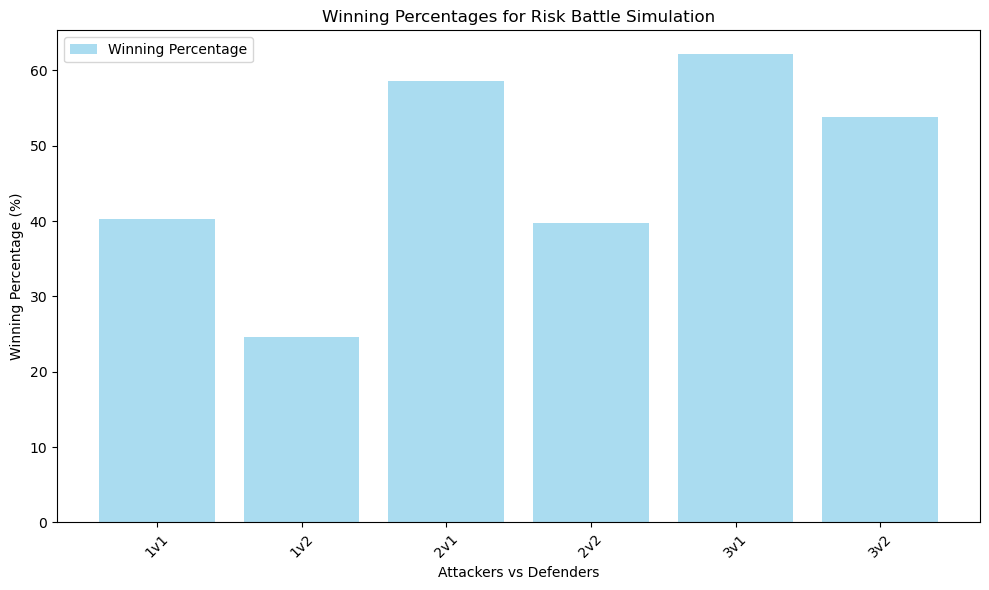

In [50]:
from typing import NamedTuple
import numpy as np
import matplotlib.pyplot as plt

n_repeats = 1000  # Number of simulations to run for each scenario

class Attack(NamedTuple):
    n_attackers: int
    n_defenders: int

# Define the different combinations of attackers and defenders
options = [
    Attack(x, y) for x in range(1, 4) for y in range(1, 3)
]

# Initialize random number generator
rng = np.random.default_rng()

# Store results to plot later
winning_percentages = []

# Simulate battles for each combination of attackers and defenders
for option in options:
    print(option)

    # Generate attacker's and defender's dice rolls
    attack = rng.integers(1, 7, size=(n_repeats, option.n_attackers))
    attack.sort(axis=1)
    attack = np.flip(attack, axis=1)  # Flip to descending order
    print(attack)

    defence = rng.integers(1, 7, size=(n_repeats, option.n_defenders))
    defence.sort(axis=1)
    defence = np.flip(defence, axis=1)  # Flip to descending order
    print(defence)

    # Compare up to the minimum number of dice
    min_length = min(attack.shape[1], defence.shape[1])
    result = attack[:, :min_length] > defence[:, :min_length]

    # Calculate winning percentage
    winning_percentage = np.sum(result) / result.size * 100
    print(f"Winning percentage for {option} is {winning_percentage:0.2f} %\n")

    # Store the result for plotting
    winning_percentages.append(winning_percentage)

# Prepare the bar chart
labels = [f"{option.n_attackers}v{option.n_defenders}" for option in options]
x_pos = np.arange(len(labels))

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x_pos, winning_percentages, align='center', alpha=0.7, color='skyblue')
plt.xticks(x_pos, labels, rotation=45)
plt.xlabel('Attackers vs Defenders')
plt.ylabel('Winning Percentage (%)')
plt.title('Winning Percentages for Risk Battle Simulation')
plt.tight_layout()
plt.legend(['Winning Percentage'])
plt.show()


Attack(n_attackers=1, n_defenders=1)
[[6]
 [6]
 [1]
 [6]
 [4]
 [1]
 [4]
 [2]
 [5]
 [2]
 [2]
 [6]
 [1]
 [3]
 [6]
 [5]
 [6]
 [6]
 [2]
 [3]
 [1]
 [2]
 [3]
 [4]
 [2]
 [3]
 [2]
 [5]
 [5]
 [1]
 [3]
 [1]
 [6]
 [5]
 [4]
 [4]
 [4]
 [1]
 [3]
 [5]
 [3]
 [6]
 [4]
 [5]
 [1]
 [1]
 [5]
 [5]
 [4]
 [6]
 [5]
 [1]
 [3]
 [5]
 [5]
 [6]
 [4]
 [6]
 [3]
 [5]
 [4]
 [2]
 [5]
 [6]
 [5]
 [1]
 [1]
 [3]
 [4]
 [6]
 [5]
 [1]
 [2]
 [3]
 [6]
 [1]
 [4]
 [2]
 [2]
 [3]
 [4]
 [6]
 [3]
 [1]
 [6]
 [2]
 [4]
 [2]
 [2]
 [1]
 [4]
 [2]
 [2]
 [3]
 [3]
 [2]
 [6]
 [4]
 [2]
 [2]
 [2]
 [2]
 [5]
 [2]
 [6]
 [2]
 [2]
 [5]
 [1]
 [3]
 [4]
 [2]
 [1]
 [1]
 [1]
 [1]
 [4]
 [2]
 [5]
 [4]
 [2]
 [2]
 [4]
 [1]
 [2]
 [3]
 [1]
 [5]
 [4]
 [5]
 [6]
 [3]
 [2]
 [1]
 [2]
 [6]
 [5]
 [2]
 [2]
 [5]
 [6]
 [2]
 [2]
 [5]
 [6]
 [6]
 [2]
 [1]
 [5]
 [3]
 [5]
 [3]
 [4]
 [4]
 [2]
 [2]
 [6]
 [2]
 [4]
 [2]
 [5]
 [1]
 [1]
 [3]
 [3]
 [3]
 [5]
 [1]
 [1]
 [6]
 [1]
 [4]
 [4]
 [2]
 [5]
 [2]
 [6]
 [3]
 [4]
 [2]
 [5]
 [6]
 [6]
 [4]
 [5]
 [5]
 [3]
 [5]
 [3]
 [1]
 [1]
 [3]
 [6

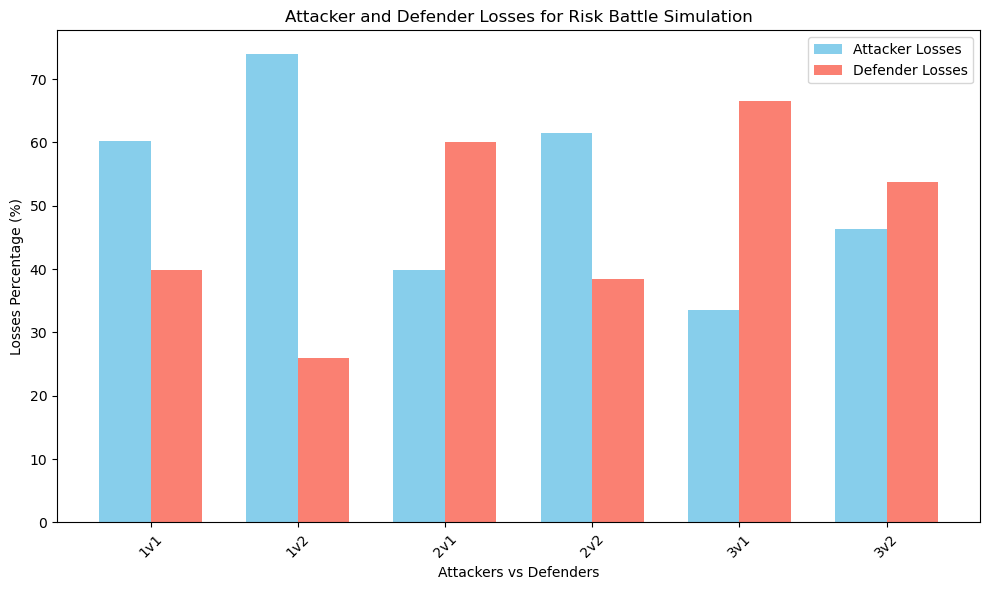

In [48]:
from typing import NamedTuple
import numpy as np
import matplotlib.pyplot as plt

n_repeats = 1000  # Number of simulations to run for each scenario

class Attack(NamedTuple):
    n_attackers: int
    n_defenders: int

# Define the different combinations of attackers and defenders
options = [
    Attack(x, y) for x in range(1, 4) for y in range(1, 3)
]

# Initialize random number generator
rng = np.random.default_rng()

# Store results to plot later
attacker_losses = []
defender_losses = []

# Simulate battles for each combination of attackers and defenders
for option in options:
    print(option)

    # Generate attacker's and defender's dice rolls
    attack = rng.integers(1, 7, size=(n_repeats, option.n_attackers))
    attack.sort(axis=1)
    attack = np.flip(attack, axis=1)  # Flip to descending order
    print(attack)

    defence = rng.integers(1, 7, size=(n_repeats, option.n_defenders))
    defence.sort(axis=1)
    defence = np.flip(defence, axis=1)  # Flip to descending order
    print(defence)

    # Compare up to the minimum number of dice
    min_length = min(attack.shape[1], defence.shape[1])
    result = attack[:, :min_length] > defence[:, :min_length]

    # Calculate losses for both attacker and defender
    losses_attacker = np.sum(result == False)  # Attacker loses where result is False
    losses_defender = np.sum(result == True)   # Defender loses where result is True

    print(f"Attacker losses: {losses_attacker}, Defender losses: {losses_defender}\n")

    # Store the results for plotting
    attacker_losses.append(losses_attacker / (n_repeats * min_length) * 100)  # Convert to percentage
    defender_losses.append(losses_defender / (n_repeats * min_length) * 100)  # Convert to percentage

# Prepare the bar chart
labels = [f"{option.n_attackers}v{option.n_defenders}" for option in options]
x_pos = np.arange(len(labels))

# Plotting the bar chart with two bars for each simulation (attacker losses and defender losses)
bar_width = 0.35  # Width of the bars
plt.figure(figsize=(10, 6))

# Plotting the attacker and defender losses side by side
plt.bar(x_pos - bar_width / 2, attacker_losses, bar_width, label='Attacker Losses', color='skyblue')
plt.bar(x_pos + bar_width / 2, defender_losses, bar_width, label='Defender Losses', color='salmon')

# Adding labels and title
plt.xticks(x_pos, labels, rotation=45)
plt.xlabel('Attackers vs Defenders')
plt.ylabel('Losses Percentage (%)')
plt.title('Attacker and Defender Losses for Risk Battle Simulation')

# Show legend
plt.legend()

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


Attack(n_attackers=1, n_defenders=1)
[[6]
 [2]
 [6]
 [2]
 [3]
 [5]
 [3]
 [4]
 [3]
 [6]
 [6]
 [3]
 [2]
 [3]
 [2]
 [6]
 [5]
 [2]
 [6]
 [1]
 [3]
 [6]
 [6]
 [1]
 [4]
 [3]
 [1]
 [5]
 [1]
 [3]
 [5]
 [6]
 [5]
 [5]
 [5]
 [4]
 [6]
 [3]
 [5]
 [1]
 [2]
 [3]
 [3]
 [4]
 [2]
 [4]
 [2]
 [4]
 [3]
 [5]
 [3]
 [3]
 [6]
 [5]
 [3]
 [2]
 [6]
 [2]
 [4]
 [4]
 [2]
 [5]
 [4]
 [3]
 [3]
 [3]
 [5]
 [2]
 [1]
 [4]
 [3]
 [5]
 [4]
 [2]
 [5]
 [3]
 [2]
 [2]
 [3]
 [2]
 [3]
 [2]
 [2]
 [6]
 [6]
 [6]
 [3]
 [2]
 [5]
 [2]
 [4]
 [5]
 [4]
 [4]
 [3]
 [1]
 [2]
 [4]
 [4]
 [6]
 [1]
 [4]
 [4]
 [3]
 [4]
 [1]
 [3]
 [4]
 [4]
 [4]
 [6]
 [3]
 [1]
 [3]
 [3]
 [5]
 [3]
 [3]
 [6]
 [1]
 [5]
 [6]
 [3]
 [4]
 [4]
 [4]
 [6]
 [3]
 [1]
 [6]
 [2]
 [3]
 [3]
 [6]
 [2]
 [5]
 [2]
 [4]
 [1]
 [5]
 [2]
 [3]
 [5]
 [2]
 [5]
 [6]
 [2]
 [1]
 [6]
 [4]
 [2]
 [6]
 [5]
 [3]
 [3]
 [4]
 [3]
 [2]
 [5]
 [5]
 [2]
 [3]
 [2]
 [5]
 [6]
 [1]
 [6]
 [5]
 [2]
 [3]
 [4]
 [3]
 [3]
 [3]
 [1]
 [2]
 [6]
 [4]
 [2]
 [6]
 [6]
 [1]
 [1]
 [5]
 [4]
 [3]
 [1]
 [5]
 [5]
 [1]
 [3]
 [5]
 [4

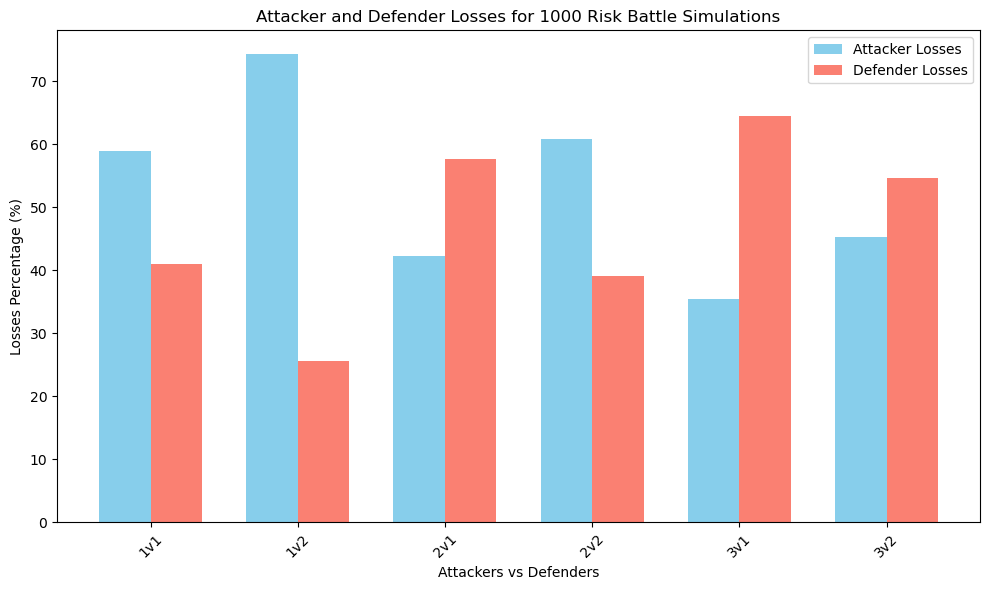

In [49]:
from typing import NamedTuple
import numpy as np
import matplotlib.pyplot as plt

# Set number of simulations (1000 battles per combination)
n_repeats = 1000  # Simulate 1000 battles for each attacker/defender combination

class Attack(NamedTuple):
    n_attackers: int
    n_defenders: int

# Define the different combinations of attackers and defenders
options = [
    Attack(x, y) for x in range(1, 4) for y in range(1, 3)
]

# Initialize random number generator
rng = np.random.default_rng()

# Store results to plot later
attacker_losses = []
defender_losses = []

# Simulate battles for each combination of attackers and defenders
for option in options:
    print(option)

    # Generate attacker's and defender's dice rolls
    attack = rng.integers(1, 7, size=(n_repeats, option.n_attackers))
    attack.sort(axis=1)
    attack = np.flip(attack, axis=1)  # Flip to descending order
    print(attack)

    defence = rng.integers(1, 7, size=(n_repeats, option.n_defenders))
    defence.sort(axis=1)
    defence = np.flip(defence, axis=1)  # Flip to descending order
    print(defence)

    # Compare up to the minimum number of dice
    min_length = min(attack.shape[1], defence.shape[1])
    result = attack[:, :min_length] > defence[:, :min_length]

    # Calculate losses for both attacker and defender
    losses_attacker = np.sum(result == False)  # Attacker loses where result is False
    losses_defender = np.sum(result == True)   # Defender loses where result is True

    print(f"Attacker losses: {losses_attacker}, Defender losses: {losses_defender}\n")

    # Store the results for plotting
    attacker_losses.append(losses_attacker / (n_repeats * min_length) * 100)  # Convert to percentage
    defender_losses.append(losses_defender / (n_repeats * min_length) * 100)  # Convert to percentage

# Prepare the bar chart
labels = [f"{option.n_attackers}v{option.n_defenders}" for option in options]
x_pos = np.arange(len(labels))

# Plotting the bar chart with two bars for each simulation (attacker losses and defender losses)
bar_width = 0.35  # Width of the bars
plt.figure(figsize=(10, 6))

# Plotting the attacker and defender losses side by side
plt.bar(x_pos - bar_width / 2, attacker_losses, bar_width, label='Attacker Losses', color='skyblue')
plt.bar(x_pos + bar_width / 2, defender_losses, bar_width, label='Defender Losses', color='salmon')

# Adding labels and title
plt.xticks(x_pos, labels, rotation=45)
plt.xlabel('Attackers vs Defenders')
plt.ylabel('Losses Percentage (%)')
plt.title('Attacker and Defender Losses for 1000 Risk Battle Simulations')

# Show legend
plt.legend()

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


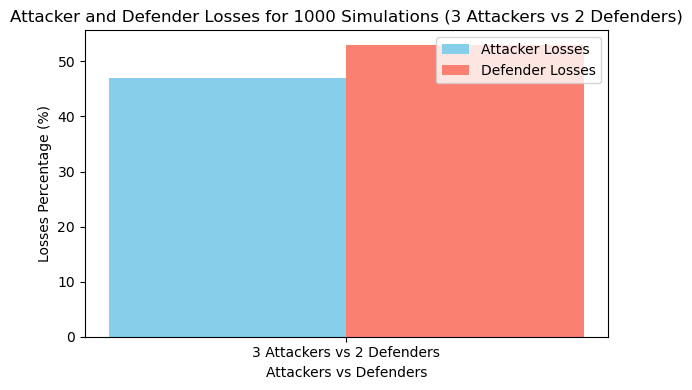

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Number of simulations (battles)
n_repeats = 1000

# Number of attackers and defenders
n_attackers = 3
n_defenders = 2

# Initialize random number generator
rng = np.random.default_rng()

# Store the results to calculate the loss percentages
attacker_losses = []
defender_losses = []

# Simulate the battles for 1000 repetitions
attack = rng.integers(1, 7, size=(n_repeats, n_attackers))  # Attacker's dice rolls
attack.sort(axis=1)  # Sort dice rolls in descending order
attack = np.flip(attack, axis=1)  # Flip to get the highest rolls first

defence = rng.integers(1, 7, size=(n_repeats, n_defenders))  # Defender's dice rolls
defence.sort(axis=1)  # Sort dice rolls in descending order
defence = np.flip(defence, axis=1)  # Flip to get the highest rolls first

# Compare up to the minimum number of dice
min_length = min(attack.shape[1], defence.shape[1])
result = attack[:, :min_length] > defence[:, :min_length]  # Compare attacker vs defender

# Calculate the losses for both attacker and defender
losses_attacker = np.sum(result == False)  # Attacker loses when result is False
losses_defender = np.sum(result == True)   # Defender loses when result is True

# Calculate the percentage of losses for both sides
attacker_loss_percentage = losses_attacker / (n_repeats * min_length) * 100
defender_loss_percentage = losses_defender / (n_repeats * min_length) * 100

# Store the results
attacker_losses.append(attacker_loss_percentage)
defender_losses.append(defender_loss_percentage)

# Plotting the bar chart
labels = ['3 Attackers vs 2 Defenders']
x_pos = np.arange(len(labels))

# Plotting the attacker and defender losses side by side
bar_width = 0.35  # Width of the bars
plt.figure(figsize=(6, 4))

# Plotting the attacker and defender losses
plt.bar(x_pos - bar_width / 2, attacker_losses, bar_width, label='Attacker Losses', color='skyblue')
plt.bar(x_pos + bar_width / 2, defender_losses, bar_width, label='Defender Losses', color='salmon')

# Adding labels and title
plt.xticks(x_pos, labels)
plt.xlabel('Attackers vs Defenders')
plt.ylabel('Losses Percentage (%)')
plt.title('Attacker and Defender Losses for 1000 Simulations (3 Attackers vs 2 Defenders)')

# Show legend
plt.legend()

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


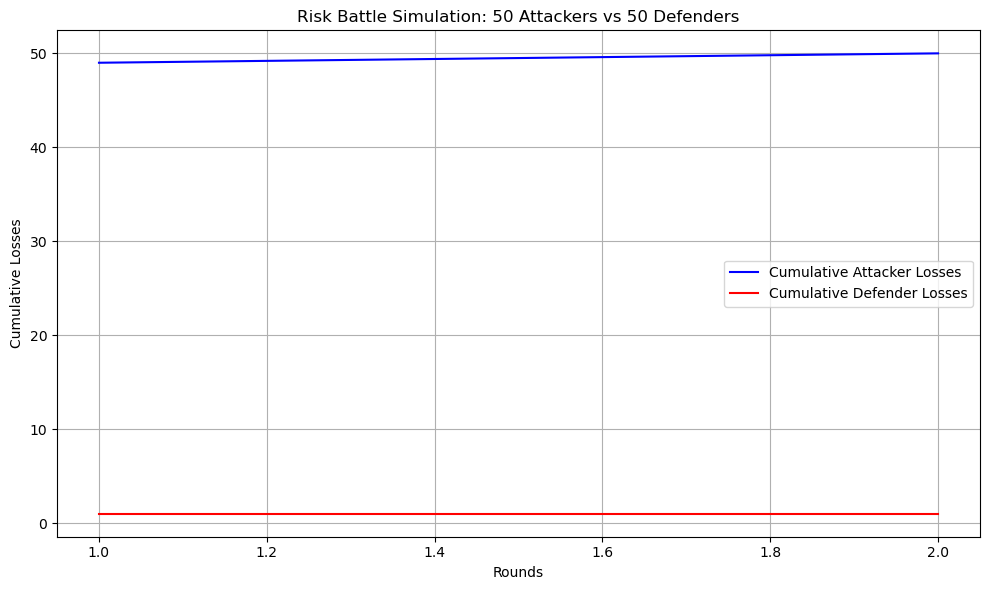

Battle ended after 2 rounds.
Remaining Attackers: 0, Remaining Defenders: 49


In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate a battle round
def simulate_battle_round(attackers, defenders, rng):
    attack_rolls = rng.integers(1, 7, size=attackers)
    defend_rolls = rng.integers(1, 7, size=defenders)

    # Sort the dice rolls in descending order
    attack_rolls.sort()
    defend_rolls.sort()

    # Flip to get the highest values first
    attack_rolls = np.flip(attack_rolls)
    defend_rolls = np.flip(defend_rolls)

    # Determine the number of comparisons
    comparisons = min(attackers, defenders)

    # Compare the highest rolls
    attacker_losses = np.sum(attack_rolls[:comparisons] <= defend_rolls[:comparisons])
    defender_losses = comparisons - attacker_losses

    # Return the number of losses for each side
    return attacker_losses, defender_losses

# Function to simulate the entire battle until one side is wiped out
def simulate_battle(attackers, defenders, rng, max_rounds=1000):
    attacker_losses = []
    defender_losses = []

    # Keep simulating rounds until one side is wiped out
    round_count = 0
    while attackers > 0 and defenders > 0 and round_count < max_rounds:
        round_count += 1
        # Simulate a round and get the number of losses for each side
        a_losses, d_losses = simulate_battle_round(attackers, defenders, rng)

        # Update the number of remaining attackers and defenders
        attackers -= a_losses
        defenders -= d_losses

        # Store the losses at this round
        attacker_losses.append(a_losses)
        defender_losses.append(d_losses)

    # Return the results and final number of units for each side
    return attacker_losses, defender_losses, attackers, defenders, round_count

# Number of attackers and defenders
n_attackers = 50
n_defenders = 50

# Initialize random number generator
rng = np.random.default_rng()

# Simulate the battle
attacker_losses, defender_losses, final_attackers, final_defenders, rounds_fought = simulate_battle(n_attackers, n_defenders, rng)

# Plot the results of the simulation
rounds = np.arange(1, rounds_fought + 1)

plt.figure(figsize=(10, 6))
plt.plot(rounds, np.cumsum(attacker_losses), label='Cumulative Attacker Losses', color='blue')
plt.plot(rounds, np.cumsum(defender_losses), label='Cumulative Defender Losses', color='red')

# Adding labels and title
plt.xlabel('Rounds')
plt.ylabel('Cumulative Losses')
plt.title(f'Risk Battle Simulation: {n_attackers} Attackers vs {n_defenders} Defenders')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the final result
print(f"Battle ended after {rounds_fought} rounds.")
print(f"Remaining Attackers: {final_attackers}, Remaining Defenders: {final_defenders}")


Round 1: Attacker losses = 26, Defender losses = 24
Remaining Attackers: 24, Remaining Defenders: 26
Round 2: Attacker losses = 21, Defender losses = 3
Remaining Attackers: 3, Remaining Defenders: 23
Round 3: Attacker losses = 3, Defender losses = 0
Remaining Attackers: 0, Remaining Defenders: 23


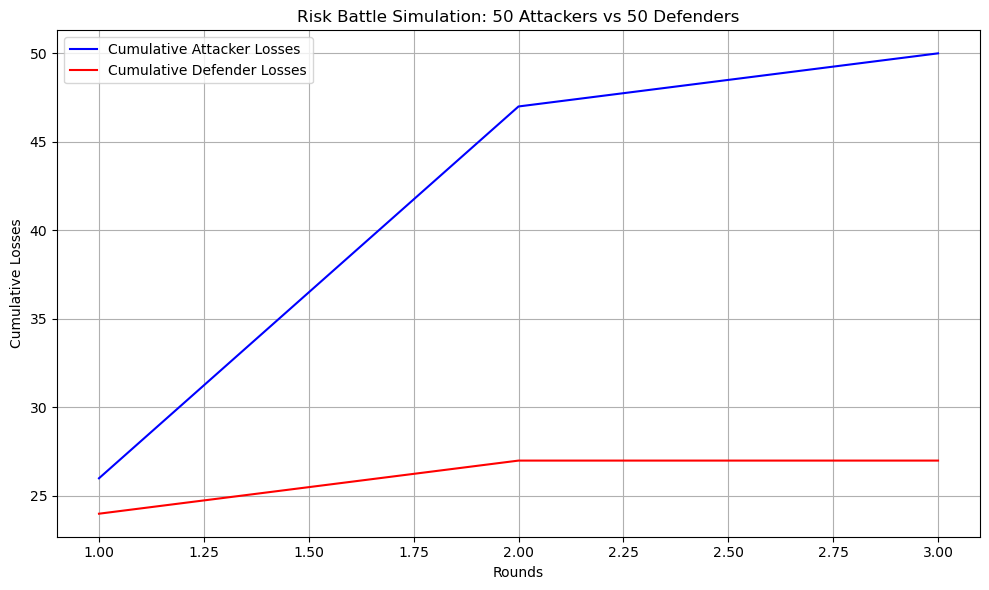

Battle ended after 3 rounds.
Remaining Attackers: 0, Remaining Defenders: 23


In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate a battle round
def simulate_battle_round(attackers, defenders, rng):
    attack_rolls = rng.integers(1, 7, size=attackers)
    defend_rolls = rng.integers(1, 7, size=defenders)

    # Sort the dice rolls in descending order
    attack_rolls.sort()
    defend_rolls.sort()

    # Flip to get the highest values first
    attack_rolls = np.flip(attack_rolls)
    defend_rolls = np.flip(defend_rolls)

    # Determine the number of comparisons (min of attackers or defenders)
    comparisons = min(attackers, defenders)

    # Determine losses for each side
    attacker_losses = np.sum(attack_rolls[:comparisons] <= defend_rolls[:comparisons])
    defender_losses = comparisons - attacker_losses

    # Return the number of losses for each side
    return attacker_losses, defender_losses

# Function to simulate the entire battle until one side is wiped out
def simulate_battle(attackers, defenders, rng, max_rounds=1000):
    attacker_losses = []
    defender_losses = []

    round_count = 0
    while attackers > 0 and defenders > 0 and round_count < max_rounds:
        round_count += 1
        # Simulate a round and get the number of losses for each side
        a_losses, d_losses = simulate_battle_round(attackers, defenders, rng)

        # Update the number of remaining attackers and defenders
        attackers -= a_losses
        defenders -= d_losses

        # Store the losses at this round
        attacker_losses.append(a_losses)
        defender_losses.append(d_losses)

        # Debugging print statement: check the number of units and losses after each round
        print(f"Round {round_count}: Attacker losses = {a_losses}, Defender losses = {d_losses}")
        print(f"Remaining Attackers: {attackers}, Remaining Defenders: {defenders}")

    # Return the results and final number of units for each side
    return attacker_losses, defender_losses, attackers, defenders, round_count

# Number of attackers and defenders
n_attackers = 50
n_defenders = 50

# Initialize random number generator
rng = np.random.default_rng()

# Simulate the battle
attacker_losses, defender_losses, final_attackers, final_defenders, rounds_fought = simulate_battle(n_attackers, n_defenders, rng)

# Plot the results of the simulation
rounds = np.arange(1, rounds_fought + 1)

plt.figure(figsize=(10, 6))
plt.plot(rounds, np.cumsum(attacker_losses), label='Cumulative Attacker Losses', color='blue')
plt.plot(rounds, np.cumsum(defender_losses), label='Cumulative Defender Losses', color='red')

# Adding labels and title
plt.xlabel('Rounds')
plt.ylabel('Cumulative Losses')
plt.title(f'Risk Battle Simulation: {n_attackers} Attackers vs {n_defenders} Defenders')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the final result
print(f"Battle ended after {rounds_fought} rounds.")
print(f"Remaining Attackers: {final_attackers}, Remaining Defenders: {final_defenders}")


Round 1: Attacker losses = 97, Defender losses = 3
Remaining Attackers: 3, Remaining Defenders: 97
Round 2: Attacker losses = 3, Defender losses = 0
Remaining Attackers: 0, Remaining Defenders: 97


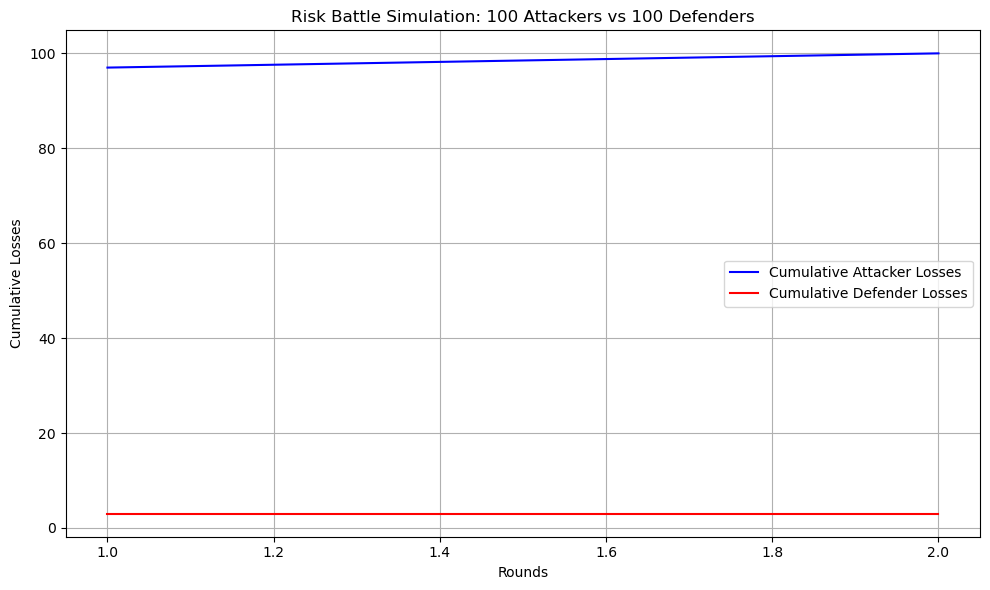

Battle ended after 2 rounds.
Remaining Attackers: 0, Remaining Defenders: 97


In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate a battle round
def simulate_battle_round(attackers, defenders, rng):
    attack_rolls = rng.integers(1, 7, size=attackers)
    defend_rolls = rng.integers(1, 7, size=defenders)

    # Sort the dice rolls in descending order
    attack_rolls.sort()
    defend_rolls.sort()

    # Flip to get the highest values first
    attack_rolls = np.flip(attack_rolls)
    defend_rolls = np.flip(defend_rolls)

    # Determine the number of comparisons (min of attackers or defenders)
    comparisons = min(attackers, defenders)

    # Determine losses for each side based on dice comparison
    # The defender wins ties (if equal rolls)
    attacker_losses = np.sum(attack_rolls[:comparisons] <= defend_rolls[:comparisons])
    defender_losses = comparisons - attacker_losses

    # Return the number of losses for each side
    return attacker_losses, defender_losses

# Function to simulate the entire battle until one side is wiped out
def simulate_battle(attackers, defenders, rng, max_rounds=1000):
    attacker_losses = []
    defender_losses = []

    round_count = 0
    while attackers > 0 and defenders > 0 and round_count < max_rounds:
        round_count += 1
        # Simulate a round and get the number of losses for each side
        a_losses, d_losses = simulate_battle_round(attackers, defenders, rng)

        # Update the number of remaining attackers and defenders
        attackers -= a_losses
        defenders -= d_losses

        # Store the losses at this round
        attacker_losses.append(a_losses)
        defender_losses.append(d_losses)

        # Debugging print statement: check the number of units and losses after each round
        print(f"Round {round_count}: Attacker losses = {a_losses}, Defender losses = {d_losses}")
        print(f"Remaining Attackers: {attackers}, Remaining Defenders: {defenders}")

    # Return the results and final number of units for each side
    return attacker_losses, defender_losses, attackers, defenders, round_count

# Number of attackers and defenders
n_attackers = 100
n_defenders = 100

# Initialize random number generator
rng = np.random.default_rng()

# Simulate the battle
attacker_losses, defender_losses, final_attackers, final_defenders, rounds_fought = simulate_battle(n_attackers, n_defenders, rng)

# Plot the results of the simulation
rounds = np.arange(1, rounds_fought + 1)

plt.figure(figsize=(10, 6))
plt.plot(rounds, np.cumsum(attacker_losses), label='Cumulative Attacker Losses', color='blue')
plt.plot(rounds, np.cumsum(defender_losses), label='Cumulative Defender Losses', color='red')

# Adding labels and title
plt.xlabel('Rounds')
plt.ylabel('Cumulative Losses')
plt.title(f'Risk Battle Simulation: {n_attackers} Attackers vs {n_defenders} Defenders')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the final result
print(f"Battle ended after {rounds_fought} rounds.")
print(f"Remaining Attackers: {final_attackers}, Remaining Defenders: {final_defenders}")


Round 1: Attacker losses = 46, Defender losses = 4
Remaining Attackers: 4, Remaining Defenders: 46
Round 2: Attacker losses = 4, Defender losses = 0
Remaining Attackers: 0, Remaining Defenders: 46


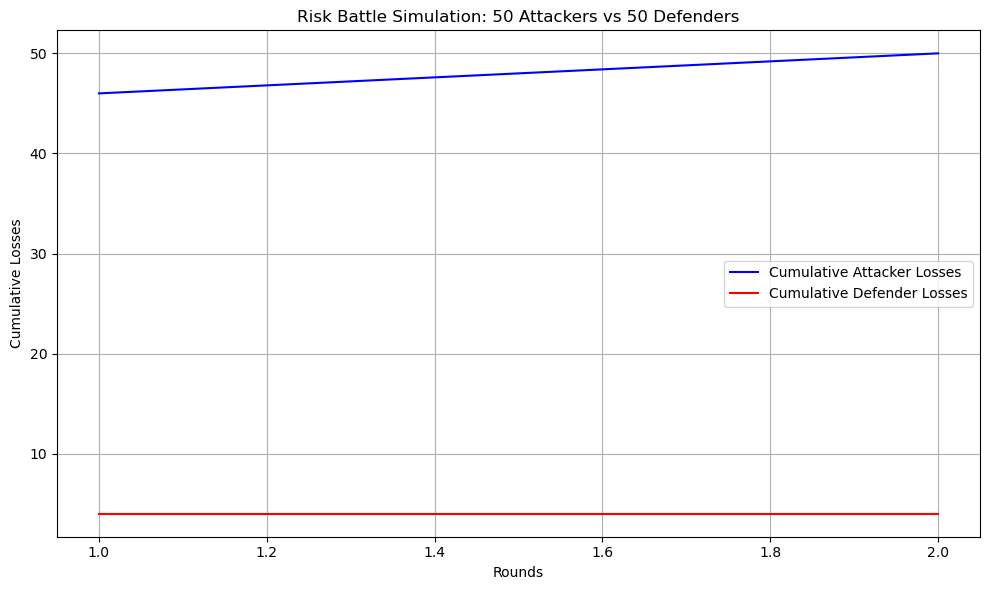

Battle ended after 2 rounds.
Remaining Attackers: 0, Remaining Defenders: 46


In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate a battle round
def simulate_battle_round(attackers, defenders, rng):
    attack_rolls = rng.integers(1, 7, size=attackers)
    defend_rolls = rng.integers(1, 7, size=defenders)

    # Sort the dice rolls in descending order
    attack_rolls.sort()
    defend_rolls.sort()

    # Flip to get the highest values first
    attack_rolls = np.flip(attack_rolls)
    defend_rolls = np.flip(defend_rolls)

    # Determine the number of comparisons (min of attackers or defenders)
    comparisons = min(attackers, defenders)

    # Determine losses for each side based on dice comparison
    # The defender wins ties (if equal rolls)
    attacker_losses = np.sum(attack_rolls[:comparisons] <= defend_rolls[:comparisons])
    defender_losses = comparisons - attacker_losses

    # Return the number of losses for each side
    return attacker_losses, defender_losses

# Function to simulate the entire battle until one side is wiped out
def simulate_battle(attackers, defenders, rng, max_rounds=1000):
    attacker_losses = []
    defender_losses = []

    round_count = 0
    while attackers > 0 and defenders > 0 and round_count < max_rounds:
        round_count += 1
        # Simulate a round and get the number of losses for each side
        a_losses, d_losses = simulate_battle_round(attackers, defenders, rng)

        # Update the number of remaining attackers and defenders
        attackers -= a_losses
        defenders -= d_losses

        # Store the losses at this round
        attacker_losses.append(a_losses)
        defender_losses.append(d_losses)

        # Debugging print statement: check the number of units and losses after each round
        print(f"Round {round_count}: Attacker losses = {a_losses}, Defender losses = {d_losses}")
        print(f"Remaining Attackers: {attackers}, Remaining Defenders: {defenders}")

    # Return the results and final number of units for each side
    return attacker_losses, defender_losses, attackers, defenders, round_count

# Number of attackers and defenders
n_attackers = 50
n_defenders = 50

# Initialize random number generator
rng = np.random.default_rng()

# Simulate the battle
attacker_losses, defender_losses, final_attackers, final_defenders, rounds_fought = simulate_battle(n_attackers, n_defenders, rng)

# Plot the results of the simulation
rounds = np.arange(1, rounds_fought + 1)

plt.figure(figsize=(10, 6))
plt.plot(rounds, np.cumsum(attacker_losses), label='Cumulative Attacker Losses', color='blue')
plt.plot(rounds, np.cumsum(defender_losses), label='Cumulative Defender Losses', color='red')

# Adding labels and title
plt.xlabel('Rounds')
plt.ylabel('Cumulative Losses')
plt.title(f'Risk Battle Simulation: {n_attackers} Attackers vs {n_defenders} Defenders')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the final result
print(f"Battle ended after {rounds_fought} rounds.")
print(f"Remaining Attackers: {final_attackers}, Remaining Defenders: {final_defenders}")


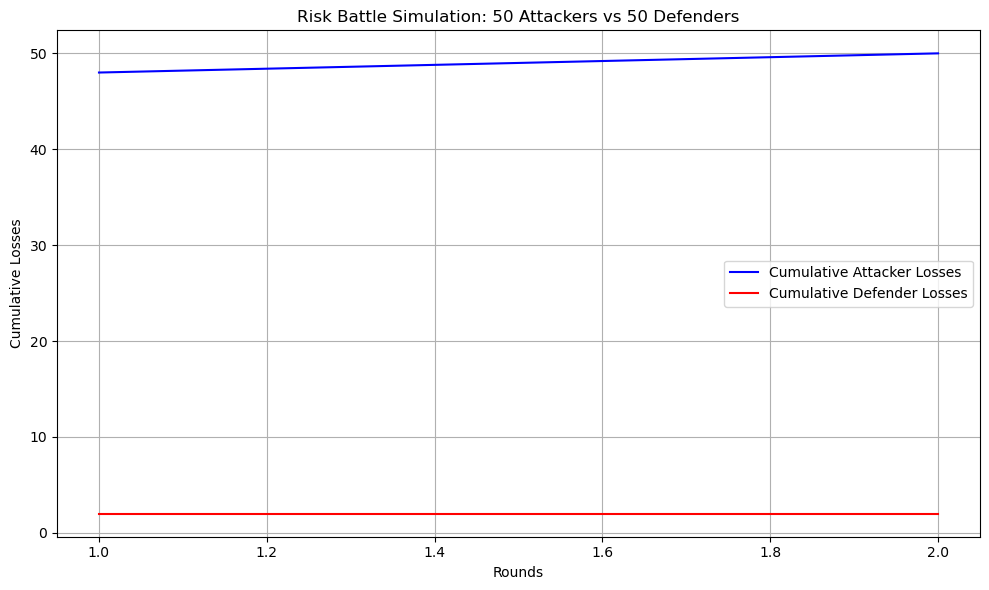

Battle ended after 2 rounds.
Remaining Attackers: 0, Remaining Defenders: 48


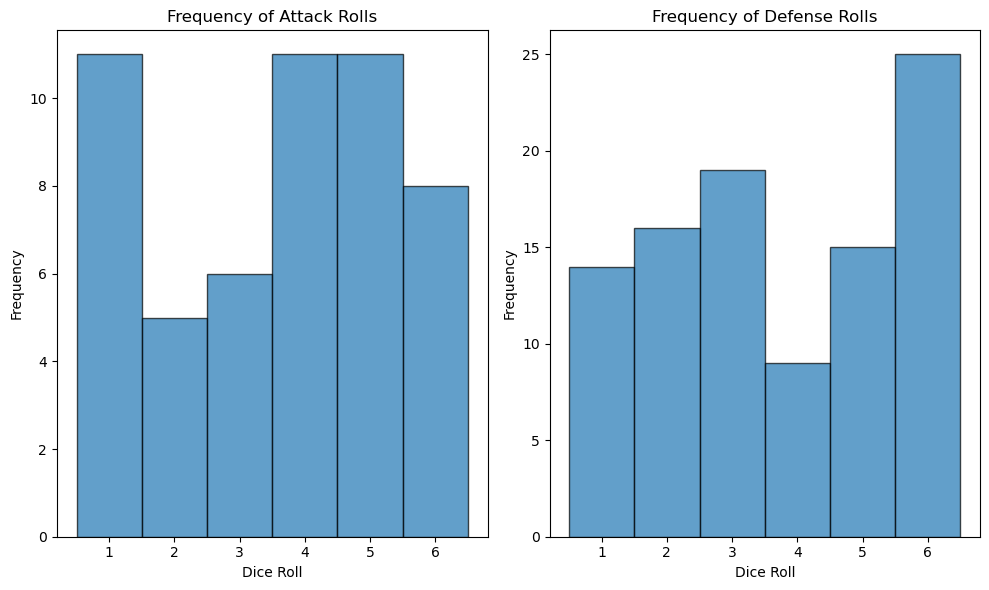

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate a battle round
def simulate_battle_round(attackers, defenders, rng):
    attack_rolls = rng.integers(1, 7, size=attackers)
    defend_rolls = rng.integers(1, 7, size=defenders)

    # Sort the dice rolls in descending order
    attack_rolls.sort()
    defend_rolls.sort()

    # Flip to get the highest values first
    attack_rolls = np.flip(attack_rolls)
    defend_rolls = np.flip(defend_rolls)

    # Determine the number of comparisons (min of attackers or defenders)
    comparisons = min(attackers, defenders)

    # Determine losses for each side based on dice comparison
    # The defender wins ties (if equal rolls)
    attacker_losses = np.sum(attack_rolls[:comparisons] <= defend_rolls[:comparisons])
    defender_losses = comparisons - attacker_losses

    # Return the number of losses for each side and the dice rolls
    return attacker_losses, defender_losses, attack_rolls, defend_rolls

# Function to simulate the entire battle until one side is wiped out
def simulate_battle(attackers, defenders, rng, max_rounds=1000):
    attacker_losses = []
    defender_losses = []
    
    # Lists to track the individual dice rolls
    all_attack_rolls = []
    all_defend_rolls = []

    round_count = 0
    while attackers > 0 and defenders > 0 and round_count < max_rounds:
        round_count += 1
        # Simulate a round and get the number of losses for each side and the dice rolls
        a_losses, d_losses, attack_rolls, defend_rolls = simulate_battle_round(attackers, defenders, rng)

        # Update the number of remaining attackers and defenders
        attackers -= a_losses
        defenders -= d_losses

        # Store the losses at this round
        attacker_losses.append(a_losses)
        defender_losses.append(d_losses)

        # Store the dice rolls for plotting frequency later
        all_attack_rolls.extend(attack_rolls)
        all_defend_rolls.extend(defend_rolls)

    # Return the results and final number of units for each side
    return attacker_losses, defender_losses, attackers, defenders, round_count, all_attack_rolls, all_defend_rolls

# Number of attackers and defenders (increase to 50 or more for longer battles)
n_attackers = 50
n_defenders = 50

# Initialize random number generator
rng = np.random.default_rng()

# Simulate the battle
attacker_losses, defender_losses, final_attackers, final_defenders, rounds_fought, all_attack_rolls, all_defend_rolls = simulate_battle(n_attackers, n_defenders, rng)

# Plot the results of the simulation
rounds = np.arange(1, rounds_fought + 1)

plt.figure(figsize=(10, 6))
plt.plot(rounds, np.cumsum(attacker_losses), label='Cumulative Attacker Losses', color='blue')
plt.plot(rounds, np.cumsum(defender_losses), label='Cumulative Defender Losses', color='red')

# Adding labels and title
plt.xlabel('Rounds')
plt.ylabel('Cumulative Losses')
plt.title(f'Risk Battle Simulation: {n_attackers} Attackers vs {n_defenders} Defenders')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the final result
print(f"Battle ended after {rounds_fought} rounds.")
print(f"Remaining Attackers: {final_attackers}, Remaining Defenders: {final_defenders}")

# Frequency of dice rolls
# Plotting the frequency of attack and defense dice rolls
plt.figure(figsize=(10, 6))

# Attack Rolls Frequency
plt.subplot(1, 2, 1)
plt.hist(all_attack_rolls, bins=np.arange(1, 8) - 0.5, edgecolor='black', alpha=0.7)
plt.title('Frequency of Attack Rolls')
plt.xlabel('Dice Roll')
plt.ylabel('Frequency')
plt.xticks(np.arange(1, 7))

# Defense Rolls Frequency
plt.subplot(1, 2, 2)
plt.hist(all_defend_rolls, bins=np.arange(1, 8) - 0.5, edgecolor='black', alpha=0.7)
plt.title('Frequency of Defense Rolls')
plt.xlabel('Dice Roll')
plt.ylabel('Frequency')
plt.xticks(np.arange(1, 7))

# Show both histograms
plt.tight_layout()
plt.show()
